# Compute scattering coefficients

Edited by Louise, 28-02-2023

We show how to compute scattering coefficients. Starting with axisymmetric wavelets.


In [87]:
from jax import jit, config
config.update("jax_enable_x64", True)

import numpy as np
import healpy as hp
from matplotlib import pyplot as plt
from importlib import reload

from PIL import Image
from matplotlib.image import pil_to_array

import scatcovjax.Sphere_lib as sphlib
import scatcovjax.Scattering_lib as scatlib
from s2wav.filter_factory.filters import filters_directional_vectorised

import s2fft

# Parameters

In [95]:
sampling = "healpix"
nside = 16
multiresolution = True
reality = True
L = 3 * nside
N = 1
J_min = 0

# Make a data map

Mean and STD: 108.175 and 38.352
(48, 95)


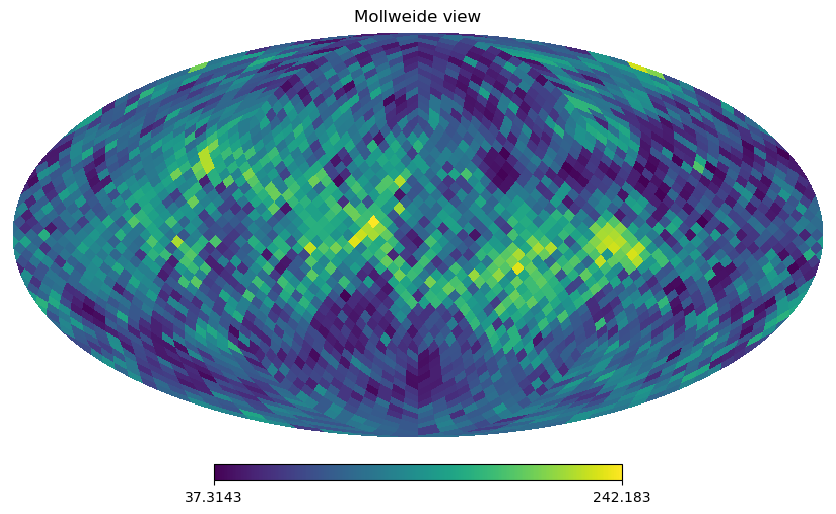

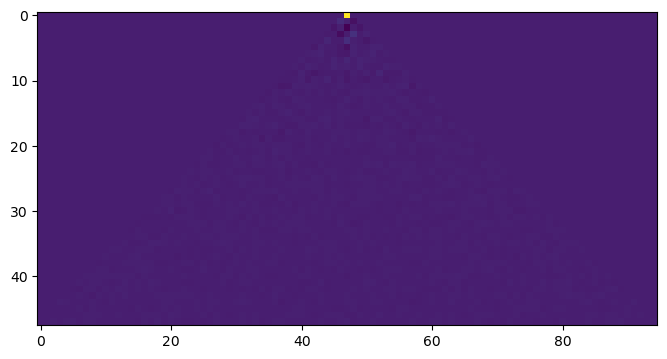

In [96]:
reload(sphlib)
# Random noise
# np.random.seed(0)
# I = np.random.randn(L, 2 * L - 1).astype(np.float64)

# Planet image
I = sphlib.make_hpx_planet(nside=nside, planet='venus', interp=True, normalize=False)
# grayscale_pil_image = Image.open('../texture_maps/venus.jpg').convert("L")
# I = pil_to_array(grayscale_pil_image)

# SHT forward transform
Ilm = s2fft.forward_jax(I, L, sampling=sampling, nside=nside)
print(Ilm.shape)

# Plot the map
# plt.figure(figsize=(8, 6))
# plt.imshow(I)
hp.mollview(I)

plt.figure(figsize=(8, 6))
plt.imshow(np.real(Ilm))

# Build the wavelets

(7, 48, 95)


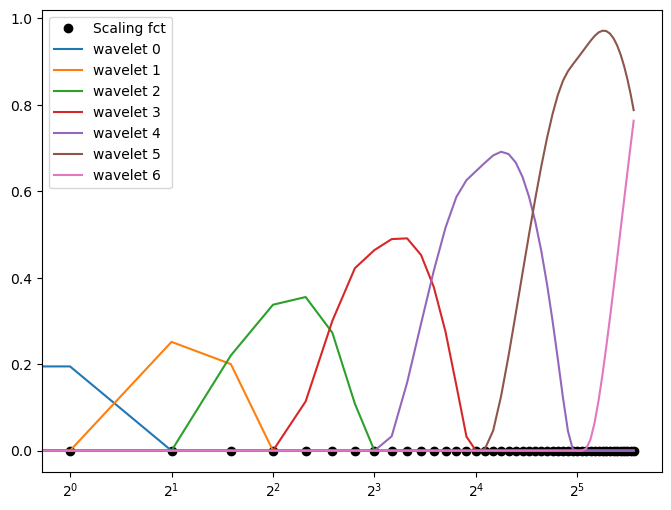

In [97]:
filters = filters_directional_vectorised(L, N, J_min)
print(filters[0].shape)

plt.figure(figsize=(8, 6))
plt.plot(filters[1], 'ko', label='Scaling fct')
for j in range(7):
    plt.plot(np.real(filters[0])[j, :, L-1], label=f'wavelet {j}')
plt.xscale('log', base=2)
plt.legend()

# Compute the scattering coefficients

In [101]:
# reload(scatlib)
# Compute the coeff
mean, var, S1, P00, C01, C11 = scatlib.scat_cov_axi(
    Ilm, L, N, J_min, sampling, nside, reality, multiresolution, filters)

S1 = np.array(S1)
P00 = np.array(P00)

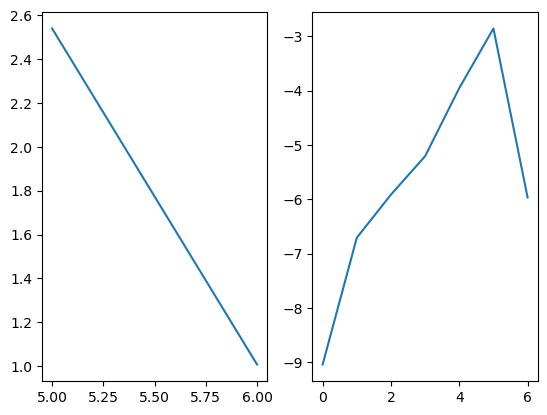

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.log2(S1)[:])
ax2.plot(np.log2(P00)[:])
plt.show()